* Smoothing, also called blurring, is a simple and frequently used image processing operation.

* There are many reasons for smoothing. In this tutorial we will focus on smoothing in order to reduce noise (other uses will be seen in the following tutorials).

* To perform a smoothing operation we will apply a filter to our image.

#### <span style="background-color: #FFFF00">Linear Filter </span>
The most common type of filters are linear, in which an output pixel's value (i.e. g(i,j)) is determined as a weighted sum of input pixel values (i.e. f(i+k,j+l)):

$ g(i,j) = \sum_{k,l} f(i+k, j+l) h(k,l) $

h(k,l) is called the kernel, which is nothing more than the coefficients of the filter.

It helps to visualize a filter as a window of coefficients sliding across the image.

There are many kind of filters, here we will mention the most used:

#### <span style="background-color: #FFFF00">Normalized Box Filter </span>
This filter is the simplest of all! Each output pixel is the mean of its kernel neighbors ( all of them contribute with equal weights)
The kernel is below:

$ K = \dfrac{1}{K_{width} \cdot K_{height}} \begin{bmatrix} 1 & 1 & 1 & ... & 1 \\ 1 & 1 & 1 & ... & 1 \\ . & . & . & ... & 1 \\ . & . & . & ... & 1 \\ 1 & 1 & 1 & ... & 1 \end{bmatrix} $

#### <span style="background-color: #FFFF00">Gaussian Filter</span>
* Probably the most useful filter (although not the fastest). Gaussian filtering is done by convolving each point in the input array with a Gaussian kernel and then summing them all to produce the output array.
* Just to make the picture clearer, remember how a 1D Gaussian kernel look like?

<img src="https://docs.opencv.org/master/Smoothing_Tutorial_theory_gaussian_0.jpg" alt="drawing" width="250"/>
Assuming that an image is 1D, you can notice that the pixel located in the middle would have the biggest weight. The weight of its neighbors decreases as the spatial distance between them and the center pixel increases.

#### <code>Note</code>
Remember that a 2D Gaussian can be represented as :
$G_{0}(x, y) = A e^{ \dfrac{ -(x - \mu_{x})^{2} }{ 2\sigma^{2}_{x} } + \dfrac{ -(y - \mu_{y})^{2} }{ 2\sigma^{2}_{y} } }$

where μ is the mean (the peak) and σ2 represents the variance (per each of the variables x and y)
    
#### <span style="background-color: #FFFF00"> Median Filter</span>
* The median filter run through each element of the signal (in this case the image) and replace each pixel with the median of its neighboring pixels (located in a square neighborhood around the evaluated pixel).
* Mainly used to remove salt & pepper noise. (black & white pixels)

#### <span style="background-color: #FFFF00">Bilateral Filter</span>
* So far, we have explained some filters which main goal is to smooth an input image. However, sometimes the filters do not only dissolve the noise, but also smooth away the edges. To avoid this (at certain extent at least), we can use a bilateral filter.
* In an analogous way as the Gaussian filter, the bilateral filter also considers the neighboring pixels with weights assigned to each of them. These weights have two components, the first of which is the same weighting used by the Gaussian filter. The second component takes into account the difference in intensity between the neighboring pixels and the evaluated one.

For a more detailed explanation you can check this link:- http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html

<code>NOTE:</code>
* In 1-D signals, images also can be filtered using various LPF and HPFetc.
* LPF helps in removing the noise, blurring from the image and HPF helps in finding edges in images

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


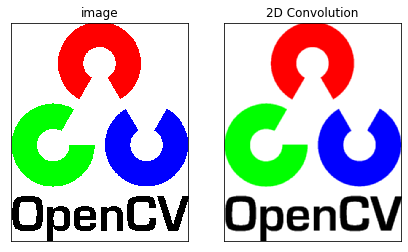

In [10]:
img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/opencv-logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)             # -1 --> depth of desired image

titles = ['image', '2D Convolution']
images = [img, dst]


plt.figure(figsize = (7,5))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Filtering of highly blurred image

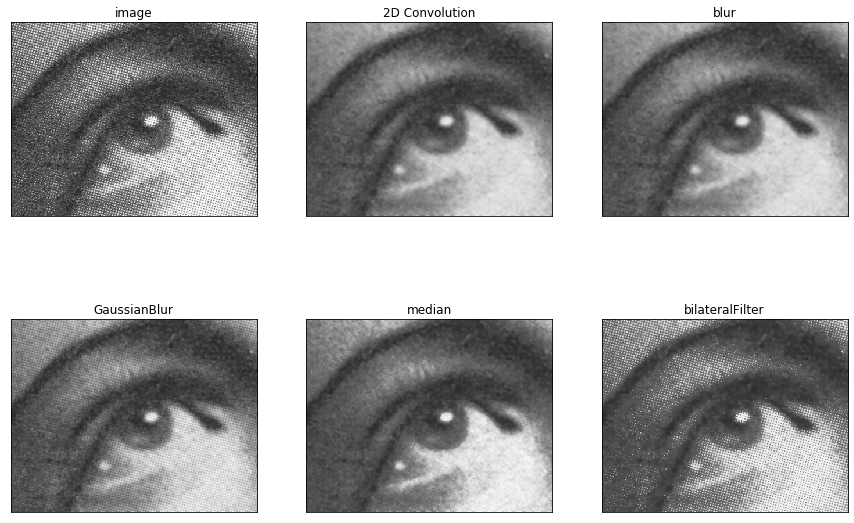

In [34]:

img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/Halftone_Gaussian_Blur.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)              # -1 --> depth of desired image

blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)                 # kernel size must be odd
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

plt.figure(figsize = (15,10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: Gaussian Filter is mainly design for filtering high frequency noise.

### Filtering of Pepper & Salt Noise

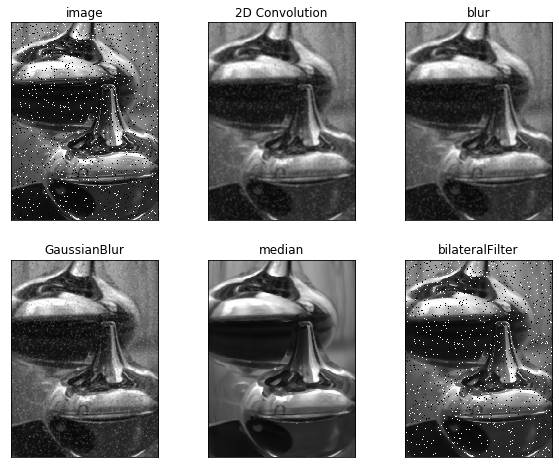

In [28]:

img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/Noise_salt_and_pepper.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)             # -1 --> depth of desired image

blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

plt.figure(figsize = (10,8))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: As it can be seen that under salt & pepper noise, median filters comes out to be best.

### As above method is used to remove the blur from the image making it smooth and due to this the edge details get smoothen. Hence to preserve the edge details we preferably used "Bilateral Filter".

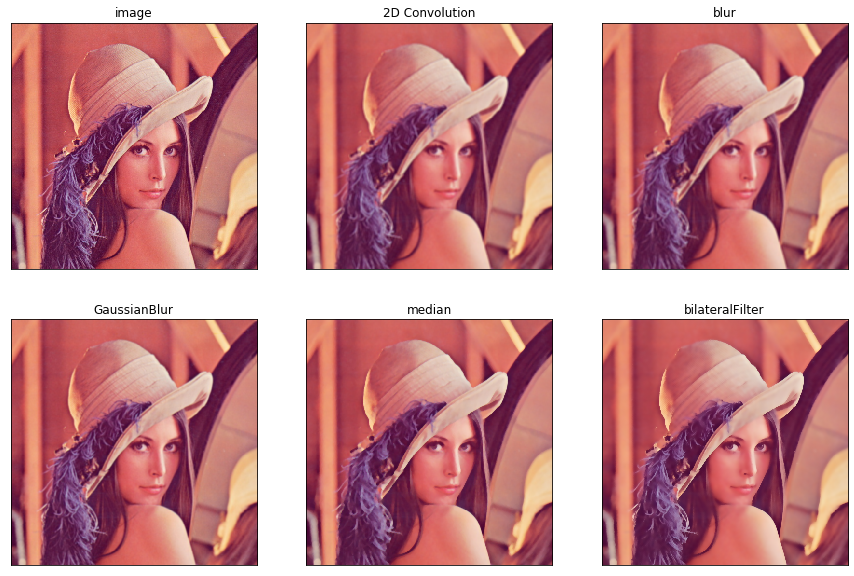

In [33]:
img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)             # -1 --> depth of desired image

blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

plt.figure(figsize = (15,10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()